In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/datasets/UcClass"

Found 4640 images belonging to 3 classes.
Found 1163 images belonging to 3 classes.
9412608/9406464 [==============================] - 0s 0us/step
Epoch 1/25
145/145 [==============================] - 145s 1s/step - loss: 1.0006 - accuracy: 0.8750 - val_loss: 0.9737 - val_accuracy: 0.9566
Epoch 2/25
145/145 [==============================] - 145s 1000ms/step - loss: 0.9612 - accuracy: 0.9664 - val_loss: 0.9480 - val_accuracy: 0.9566
Epoch 3/25
145/145 [==============================] - 141s 969ms/step - loss: 0.9348 - accuracy: 0.9722 - val_loss: 0.9281 - val_accuracy: 0.9531
Epoch 4/25
145/145 [==============================] - 139s 955ms/step - loss: 0.9125 - accuracy: 0.9778 - val_loss: 0.9072 - val_accuracy: 0.9609
Epoch 5/25
145/145 [==============================] - 138s 950ms/step - loss: 0.8916 - accuracy: 0.9812 - val_loss: 0.8871 - val_accuracy: 0.9609
Epoch 6/25
145/145 [==============================] - 139s 958ms/step - loss: 0.8705 - accuracy: 0.9845 - val_loss: 0.8681 - 

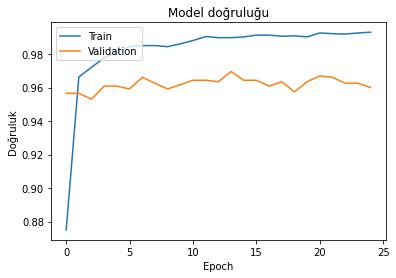

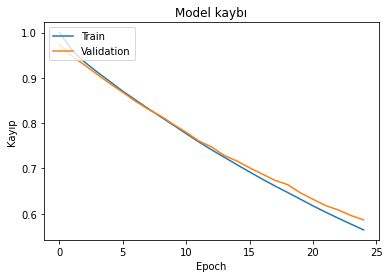

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
#import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras import Model, layers

train_dir = '/content/drive/My Drive/datasets/UcClass/train'
validation_dir = '/content/drive/My Drive/datasets/UcClass/val'

#train_dir = 'train'
#validation_dir = 'val'

train_datagen = ImageDataGenerator(
    #rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input)
 
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    class_mode='categorical',
    target_size=(224,224))
 
validation_datagen = ImageDataGenerator(
    #rescale=1./255)
    preprocessing_function=preprocess_input)
 
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size=32,
    shuffle=False,
    class_mode='categorical',
    target_size=(224,224))

conv_base = MobileNetV2(include_top=False,
                     weights='imagenet',
                     input_shape=(224, 224, 3))
for layer in conv_base.layers:
    layer.trainable = False
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='softmax')(x)
predictions = layers.Dense(3, activation='softmax')(x) #3 class sayımız
model = Model(conv_base.input, predictions)

optimizer = tf.keras.optimizers.RMSprop(lr=1e-4)
#optimizer = tf.keras.optimizers.Adam(lr=1e-4)
#optimizer = tf.keras.optimizers.Adamax(lr=1e-2, beta_1=0.9, beta_2=0.999)
#optimizer = tf.keras.optimizers.Adadelta(lr=1.0, rho=0.95)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

#model.summary()

history = model.fit_generator(
    generator=train_generator,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.n//train_generator.batch_size, 
    validation_steps=validation_generator.n//validation_generator.batch_size,
    epochs=25)

model.save('/content/drive/My Drive/datasets/UcClass/modelMobileNetV2RmspropE25.h5')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model doğruluğu')
plt.ylabel('Doğruluk')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model kaybı')
plt.ylabel('Kayıp')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()